<a href="https://colab.research.google.com/github/MaitryG/Digit_Recognizer_web_App/blob/main/DigitRecognizer_WebApp.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
!pip install gradio

     |████████████████████████████████| 3.6 MB 28.4 MB/s 
     |████████████████████████████████| 1.9 MB 41.2 MB/s 
     |████████████████████████████████| 206 kB 58.1 MB/s 
     |████████████████████████████████| 63 kB 2.5 MB/s 
     |████████████████████████████████| 3.5 MB 58.5 MB/s 
     |████████████████████████████████| 961 kB 50.0 MB/s 
  Created wheel for ffmpy: filename=ffmpy-0.3.0-py3-none-any.whl size=4710 sha256=ead867cfb1abb0c013563b2441659deb2f8ba6abf7956b8de5d9c89c9e71f9c7
  Stored in directory: /root/.cache/pip/wheels/13/e4/6c/e8059816e86796a597c6e6b0d4c880630f51a1fcfa0befd5e6
  Created wheel for flask-cachebuster: filename=Flask_CacheBuster-1.0.0-py3-none-any.whl size=3371 sha256=1c91cadead1ff3e6d04e3a949e7c5e619b2e2bcfb6cbf3ff80e6f1f092923e26
  Stored in directory: /root/.cache/pip/wheels/28/c0/c4/44687421dab41455be93112bd1b0dee1f3c5a9aa27bee63708
Successfully built ffmpy flask-cachebuster


In [ ]:
import gradio as gr

In [ ]:
import tensorflow as tf
import numpy as np
import matplotlib.pyplot as plt

objects = tf.keras.datasets.mnist
(training_images,training_labels),(test_images,test_labels) = objects.load_data()


11501568/11490434 [==============================] - 0s 0us/step


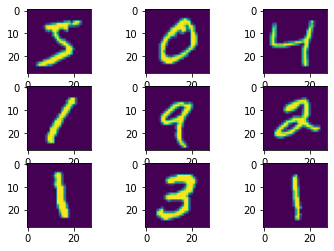

In [ ]:
for i in range(9):
  plt.subplot(330 + 1 + i)
  plt.imshow(training_images[i])

In [ ]:
training_images = training_images/255.0
test_images = test_images/255.0

In [ ]:
from tensorflow.keras.layers import Flatten, Dense
model = tf.keras.models.Sequential([Flatten(input_shape=(28,28)), 
                                    Dense(256, activation='relu'),
                                    Dense(256, activation='relu'),
                                    Dense(128, activation='relu'), 
                                    Dense(10, activation=tf.nn.softmax)])

In [ ]:
model.compile(optimizer = 'adam',
              loss = 'sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
model.fit(training_images, training_labels, epochs=10)

Epoch 1/5


ValueError: ignored

In [ ]:
test=test_images[0].reshape(-1,28,28)
pred = model.predict(test)
print(pred)

[[5.1079209e-19 1.4750768e-11 6.4796328e-11 1.2788646e-13 6.8846890e-12
  6.1598719e-19 2.3833866e-23 1.0000000e+00 3.0161594e-16 4.3617579e-12]]


In [ ]:
def predict_image(img):
  img_3d=img.reshape(-1,28,28)
  im_resize=img_3d/255.0
  prediction=model.predict(im_resize)
  pred=np.argmax(prediction)
  return pred

In [ ]:
iface = gr.Interface(predict_image, inputs="sketchpad", outputs="label")  

In [ ]:
iface.launch(debug='True')

Colab notebook detected. This cell will run indefinitely so that you can see errors and logs. To turn off, set debug=False in launch().
This share link will expire in 72 hours. If you need a permanent link, visit: https://gradio.app/introducing-hosted
Running on External URL: https://53752.gradio.app
Interface loading below...


KeyboardInterrupt: ignored